## Ingest and Wrangle

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

# Display all the columns no matter how many
pd.pandas.set_option("display.max_columns", None)

In [2]:
# import locally
from wrangle import ingest_and_split_train_val, wrangle

In [3]:
# Get the data from dataset and split into train and validation set
train, val =  ingest_and_split_train_val()
train.shape, val.shape

In [5]:
# Perform some automated wrangling
train = wrangle(train)
val = wrangle(val)
train.shape, val.shape

In [6]:
# Split into features nand label
X_train = train.drop(columns=["SalePrice"])
X_val = val.drop(columns=["SalePrice"])
y_train = train["SalePrice"]
y_val = val["SalePrice"]

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 56), (292, 56), (1168,), (292,))

## Preprocessing

In [10]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,Age,RemodAddAge,GrgAge
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977,30,RL,51.0,5900,IR1,Inside,BrkSide,Norm,1Fam,1Story,4,7,Gable,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,440,440,TA,869,0,869,0,1,0,2,Fa,4,0,NaN,NaN,NaN,0,0,0,0,0,0,NaN,8,WD,Normal,83,48,NaN
131,60,RL,88.0,14200,Reg,Corner,NAmes,Norm,1Fam,2Story,7,6,Gable,MetalSd,MetalSd,BrkFace,309.0,TA,TA,CBlock,TA,TA,No,Rec,445,Unf,0,479,924,Ex,1216,941,2157,0,2,1,4,Gd,8,2,Gd,Attchd,Fin,2,487,105,66,0,0,GdPrv,5,WD,Normal,40,40,40.0
342,20,RH,60.0,8400,Reg,Inside,SawyerW,Feedr,1Fam,1Story,4,4,Gable,Wd Sdng,AsbShng,NaN,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,721,721,Gd,841,0,841,0,1,0,2,TA,4,0,NaN,CarPort,Unf,1,294,250,0,24,0,NaN,9,WD,Normal,59,59,59.0
1107,20,RL,114.0,10357,IR1,Corner,SawyerW,Feedr,1Fam,1Story,7,5,Hip,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,738,Unf,0,172,910,Gd,1442,0,1442,1,2,0,3,Gd,6,1,TA,Attchd,Fin,2,719,0,244,0,0,NaN,5,WD,Normal,17,16,17.0
1325,20,RL,75.0,9986,Reg,Inside,Somerst,Norm,1Fam,1Story,8,5,Gable,VinylSd,VinylSd,BrkFace,428.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1795,1795,Ex,1795,0,1795,0,2,0,2,Gd,7,1,Gd,Attchd,RFn,3,895,0,49,0,0,NaN,2,New,Partial,1,0,0.0


In [11]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence',
       'MoSold', 'SaleType', 'SaleCondition', 'Age', 'RemodAddAge', 'GrgAge'],
      dtype='object')

In [12]:
# categoricals
cats = X_train.select_dtypes(include="object")
# cats.head()
cats.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# Numeric columns
nums = X_train.select_dtypes(include="number")
# nums.head()
nums.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'Age', 'RemodAddAge', 'GrgAge'],
      dtype='object')

We're performing all operations in a pipeline

In [ ]:
# Categorical columns

# Fill with most frequent value and perform one hot encoding
cat_mf_oh = ["MSZoning", "LotConfig", "Neighborhood",
             "Condition1", "BldgType", "HouseStyle",
             "RoofStyle", "Exterior1st", "Exterior2nd",
             "Foundation", "SaleType", "SaleCondition", 
             "MoSold"]

# Fill with None and perform One hot encoding
cat_none_oh = ["MasVnrType", "GarageType"]

# Fill with mostfrequent value and perform ordinal encoding
cat_mfOrd = ["LotShape", "ExterQual",
             "ExterCond", "HeatingQC",
             "KitchenQual"]

# Fill with None and perform ordinal encoding
cat_noneOrd = ["BsmtExposure", "BsmtFinType1",
               "BsmtFinType2", "FireplaceQu",
               "GarageFinish", "Fence", 'BsmtQual',
               'BsmtCond']

# Fill with most frequent values. they are already in numeric form
cat_mf = ["OverallCond", "OverallQual", "MSSubClass"]

In [ ]:
# numeric columns

#  Fill with median and perofrm standard scaling
num_med_std_attrs = ["Age", "RemodAddAge", "GrgAge",
                     "BsmtFullBath", "FullBath",
                     "HalfBath", "BedroomAbvGr",
                     "TotRmsAbvGrd", "Fireplaces",
                     "GarageCars"]

# Perform log transformation and perform standard scaling
num_log_attrs = ["LotFrontage", "LotArea",
                 "MasVnrArea", "BsmtFinSF1",
                 "BsmtFinSF2", "BsmtUnfSF",
                 "TotalBsmtSF", "1stFlrSF",
                 "2ndFlrSF", "GrLivArea", 
                 "GarageArea", "WoodDeckSF",
                 "OpenPorchSF", "EnclosedPorch",
                 "ScreenPorch"]

In [16]:
# Categorical pipelines
cat_mf_oh_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore'))

cat_none_oh_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='None'),
    OneHotEncoder(handle_unknown='ignore'))

cat_mfOrd_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=[["Reg", "IR1", "IR2", "IR3"], # Lotshape
                               ["None", "Po", "Fa", "TA", "Gd", "Ex"], # Exterqual
                               ["None", "Po", "Fa", "TA", "Gd", "Ex"],  #xtercond
                               ["None", "Po", "Fa", "TA", "Gd", "Ex"], # HeatingQC
                               ["None", "Po", "Fa", "TA", "Gd", "Ex"]], 
                   handle_unknown='error'), # # PavedDrive
    MinMaxScaler()
)

cat_noneOrd_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='None'),
    OrdinalEncoder(categories=[["None", "No", "Mn", "Av", "Gd"],  # BsmtExposure
                               ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],   # BsmtFinType1
                               ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],  # BsmtFinType2
                               ["None", "Po", "Fa", "TA", "Gd", "Ex"],  # FireplaceQu
                               ["None", "Unf", "RFn", "Fin"],  # GarageFininsh
                               ["None", "MnWw", "GdWo", "MnPrv", "GdPrv"], # Fence
                               ["None", "Po", "Fa", "TA", "Gd", "Ex"], # BsmtQual
                               ["None", "Po", "Fa", "TA", "Gd", "Ex"]], 
                   handle_unknown='error'),
    MinMaxScaler()
)

In [17]:
#numeric pipeline
num_med_std_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# log transformation
num_log_transformer = FunctionTransformer(np.log1p, validate=False, feature_names_out = 'one-to-one')

num_log_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    num_log_transformer,
    StandardScaler()
)

In [18]:
# Combine the pipelines
preprocessing = ColumnTransformer([
    ('cat_mfoh', cat_mf_oh_pipe, cat_mf_oh),
    ("cat_noneoh", cat_none_oh_pipe, cat_none_oh),
    ('cat_mfOrd', cat_mfOrd_pipe, cat_mfOrd),
    ('cat_noneOrd', cat_noneOrd_pipe, cat_noneOrd),
    
    ("num_med", num_med_std_pipe, num_med_std_attrs),
    ("num_log", num_log_pipe, num_log_attrs)],
                                  remainder='drop', sparse_threshold=0)

Test the pipeline

In [19]:
X_train_transformed = preprocessing.fit_transform(X_train)
X_train_transformed[0][:10]

Convert the transformed pipeline to a dataframe

In [21]:
# To DataFrame
X_train_prepared = pd.DataFrame(
    X_train_transformed, columns = preprocessing.get_feature_names_out(), index=X_train.index
)

# X_train_prepared.columns
len(X_train_prepared.columns)

175

In [22]:
X_train_prepared.head()

,cat_mfoh__MSZoning_C (all),cat_mfoh__MSZoning_FV,cat_mfoh__MSZoning_RH,cat_mfoh__MSZoning_RL,cat_mfoh__MSZoning_RM,cat_mfoh__LotConfig_Corner,cat_mfoh__LotConfig_CulDSac,cat_mfoh__LotConfig_FR2,cat_mfoh__LotConfig_FR3,cat_mfoh__LotConfig_Inside,cat_mfoh__Neighborhood_Blmngtn,cat_mfoh__Neighborhood_Blueste,cat_mfoh__Neighborhood_BrDale,cat_mfoh__Neighborhood_BrkSide,cat_mfoh__Neighborhood_ClearCr,cat_mfoh__Neighborhood_CollgCr,cat_mfoh__Neighborhood_Crawfor,cat_mfoh__Neighborhood_Edwards,cat_mfoh__Neighborhood_Gilbert,cat_mfoh__Neighborhood_IDOTRR,cat_mfoh__Neighborhood_MeadowV,cat_mfoh__Neighborhood_Mitchel,cat_mfoh__Neighborhood_NAmes,cat_mfoh__Neighborhood_NPkVill,cat_mfoh__Neighborhood_NWAmes,cat_mfoh__Neighborhood_NoRidge,cat_mfoh__Neighborhood_NridgHt,cat_mfoh__Neighborhood_OldTown,cat_mfoh__Neighborhood_SWISU,cat_mfoh__Neighborhood_Sawyer,cat_mfoh__Neighborhood_SawyerW,cat_mfoh__Neighborhood_Somerst,cat_mfoh__Neighborhood_StoneBr,cat_mfoh__Neighborhood_Timber,cat_mfoh__Neighborhood_Veenker,cat_mfoh__Condition1_Artery,cat_mfoh__Condition1_Feedr,cat_mfoh__Condition1_Norm,cat_mfoh__Condition1_PosA,cat_mfoh__Condition1_PosN,cat_mfoh__Condition1_RRAe,cat_mfoh__Condition1_RRAn,cat_mfoh__Condition1_RRNe,cat_mfoh__Condition1_RRNn,cat_mfoh__BldgType_1Fam,cat_mfoh__BldgType_2fmCon,cat_mfoh__BldgType_Duplex,cat_mfoh__BldgType_Twnhs,cat_mfoh__BldgType_TwnhsE,cat_mfoh__HouseStyle_1.5Fin,cat_mfoh__HouseStyle_1.5Unf,cat_mfoh__HouseStyle_1Story,cat_mfoh__HouseStyle_2.5Fin,cat_mfoh__HouseStyle_2.5Unf,cat_mfoh__HouseStyle_2Story,cat_mfoh__HouseStyle_SFoyer,cat_mfoh__HouseStyle_SLvl,cat_mfoh__RoofStyle_Flat,cat_mfoh__RoofStyle_Gable,cat_mfoh__RoofStyle_Gambrel,cat_mfoh__RoofStyle_Hip,cat_mfoh__RoofStyle_Mansard,cat_mfoh__RoofStyle_Shed,cat_mfoh__Exterior1st_AsbShng,cat_mfoh__Exterior1st_AsphShn,cat_mfoh__Exterior1st_BrkComm,cat_mfoh__Exterior1st_BrkFace,cat_mfoh__Exterior1st_CBlock,cat_mfoh__Exterior1st_CemntBd,cat_mfoh__Exterior1st_HdBoard,cat_mfoh__Exterior1st_ImStucc,cat_mfoh__Exterior1st_MetalSd,cat_mfoh__Exterior1st_Plywood,cat_mfoh__Exterior1st_Stone,cat_mfoh__Exterior1st_Stucco,cat_mfoh__Exterior1st_VinylSd,cat_mfoh__Exterior1st_Wd Sdng,cat_mfoh__Exterior1st_WdShing,cat_mfoh__Exterior2nd_AsbShng,cat_mfoh__Exterior2nd_AsphShn,cat_mfoh__Exterior2nd_Brk Cmn,cat_mfoh__Exterior2nd_BrkFace,cat_mfoh__Exterior2nd_CBlock,cat_mfoh__Exterior2nd_CmentBd,cat_mfoh__Exterior2nd_HdBoard,cat_mfoh__Exterior2nd_ImStucc,cat_mfoh__Exterior2nd_MetalSd,cat_mfoh__Exterior2nd_Plywood,cat_mfoh__Exterior2nd_Stone,cat_mfoh__Exterior2nd_Stucco,cat_mfoh__Exterior2nd_VinylSd,cat_mfoh__Exterior2nd_Wd Sdng,cat_mfoh__Exterior2nd_Wd Shng,cat_mfoh__Foundation_BrkTil,cat_mfoh__Foundation_CBlock,cat_mfoh__Foundation_PConc,cat_mfoh__Foundation_Slab,cat_mfoh__Foundation_Stone,cat_mfoh__Foundation_Wood,cat_mfoh__SaleType_COD,cat_mfoh__SaleType_CWD,cat_mfoh__SaleType_Con,cat_mfoh__SaleType_ConLD,cat_mfoh__SaleType_ConLI,cat_mfoh__SaleType_ConLw,cat_mfoh__SaleType_New,cat_mfoh__SaleType_Oth,cat_mfoh__SaleType_WD,cat_mfoh__SaleCondition_Abnorml,cat_mfoh__SaleCondition_AdjLand,cat_mfoh__SaleCondition_Alloca,cat_mfoh__SaleCondition_Family,cat_mfoh__SaleCondition_Normal,cat_mfoh__SaleCondition_Partial,cat_mfoh__MoSold_1,cat_mfoh__MoSold_2,cat_mfoh__MoSold_3,cat_mfoh__MoSold_4,cat_mfoh__MoSold_5,cat_mfoh__MoSold_6,cat_mfoh__MoSold_7,cat_mfoh__MoSold_8,cat_mfoh__MoSold_9,cat_mfoh__MoSold_10,cat_mfoh__MoSold_11,cat_mfoh__MoSold_12,cat_noneoh__MasVnrType_BrkCmn,cat_noneoh__MasVnrType_BrkFace,cat_noneoh__MasVnrType_None,cat_noneoh__MasVnrType_Stone,cat_noneoh__GarageType_2Types,cat_noneoh__GarageType_Attchd,cat_noneoh__GarageType_Basment,cat_noneoh__GarageType_BuiltIn,cat_noneoh__GarageType_CarPort,cat_noneoh__GarageType_Detchd,cat_noneoh__GarageType_None,cat_mfOrd__LotShape,cat_mfOrd__ExterQual,cat_mfOrd__ExterCond,cat_mfOrd__HeatingQC,cat_mfOrd__KitchenQual,cat_noneOrd__BsmtExposure,cat_noneOrd__BsmtFinType1,cat_noneOrd__BsmtFinType2,cat_noneOrd__FireplaceQu,cat_noneOrd__GarageFin

In [23]:
# This is the pipeline
preprocessing

ColumnTransformer(sparse_threshold=0,
                  transformers=[('cat_mfoh',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MSZoning', 'LotConfig', 'Neighborhood',
                                  'Condition1', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'Exterior1st', 'Exterior2nd',
                                  'Foundation', 'SaleType', 'SaleCondition...
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['LotFrontage', 'LotArea', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'GrLivArea', 'GarageArea', 'WoodDeckSF',
                                  'OpenPorchSF', 'EnclosedPorch',
                                  'ScreenPorch'])])

## Modelling

In [26]:
# Instantiate a pipeline for elastic net model
elastic_pipeline = Pipeline([
    ("prep", preprocessing),
    ("sgd", SGDRegressor(penalty="elasticnet", tol=0.001, eta0=0.01, random_state=42, max_iter=1000))
]) 

In [27]:
# Fit and make predictions on the training set
elastic_pipeline.fit(X_train, y_train)
elastic_train_preds = elastic_pipeline.predict(X_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('cat_mfoh',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'LotConfig',
                                                   'Neighborhood', 'Condition1',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   '...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch',
                                                   'ScreenPorch'])])),
                ('sgd', SGDRegressor(penalty='elasticnet', random_state=42))])

In [29]:
# Get the rmse value of the train preds
elastic_rmse = mean_squared_error(y_train, elastic_train_preds, squared=False)
elastic_rmse

29972.70242438641

In [30]:
# Make prediction on the validation set
elastic_val_preds = elastic_pipeline.predict(X_val)
elastic_val_rmse = mean_squared_error(y_val, elastic_val_preds, squared=False)
elastic_val_rmse

33508.0502073821

On average the predictions of the validataion set is about 4000 dollars off the train prediction

## Communication

In [31]:
# Get the coefficients and intercepts
coefficients = elastic_pipeline.named_steps['sgd'].coef_
intercept = elastic_pipeline.named_steps['sgd'].intercept_

In [32]:
# Featrue names
feature_names = elastic_pipeline.named_steps["prep"].get_feature_names_out()

In [33]:
# Feature importances
feature_importances = pd.Series(coefficients, index=feature_names)
feature_importances.head()

cat_mfoh__MSZoning_C (all)   -9207.080641
cat_mfoh__MSZoning_FV         7297.344128
cat_mfoh__MSZoning_RH         8570.367512
cat_mfoh__MSZoning_RL         5879.276035
cat_mfoh__MSZoning_RM         4067.075501
dtype: float64

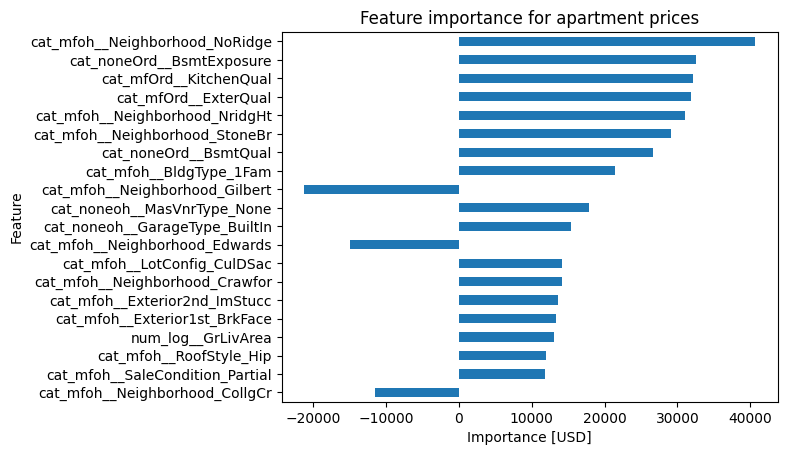

In [34]:
# Plot the feature importances
feature_importances.sort_values(key=abs).tail(20).plot(kind='barh')
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature importance for apartment prices");

Apperently, the kind of neighborhood plays the most important role

In [35]:
import joblib

In [38]:
# Save the pipeline to a file using joblib
joblib.dump(elastic_pipeline, 'model/elastic_pipeline.pkl')

['model/elastic_pipeline.pkl']